In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kaggle_covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168844,ZWE,Africa,Zimbabwe,2022-03-12,242069.0,521.0,435.714,5412.0,4.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168845,ZWE,Africa,Zimbabwe,2022-03-13,242515.0,446.0,472.286,5414.0,2.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168846,ZWE,Africa,Zimbabwe,2022-03-14,242909.0,394.0,457.000,5416.0,2.0,2.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168847,ZWE,Africa,Zimbabwe,2022-03-15,242909.0,0.0,366.571,5416.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168849 entries, 0 to 168848
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    168849 non-null  object 
 1   continent                                   158750 non-null  object 
 2   location                                    168849 non-null  object 
 3   date                                        168849 non-null  object 
 4   total_cases                                 165801 non-null  float64
 5   new_cases                                   165654 non-null  float64
 6   new_cases_smoothed                          163659 non-null  float64
 7   total_deaths                                147865 non-null  float64
 8   new_deaths                                  147905 non-null  float64
 9   new_deaths_smoothed                         145789 non-null  float64
 

In [4]:
df.shape

(168849, 67)

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.658010e+05,1.656540e+05,1.636590e+05,1.478650e+05,147905.000000,145789.000000,165032.000000,164885.000000,162896.000000,147109.000000,...,107651.000000,106174.000000,69609.000000,125529.000000,157626.000000,138327.000000,5.812000e+03,5812.000000,5812.000000,5812.000000
mean,2.626133e+06,1.188453e+04,1.186733e+04,5.859486e+04,170.226679,171.919379,30866.794263,172.369983,171.395620,519.509515,...,10.626813,32.779210,50.782084,3.027506,73.574931,0.725544,3.840378e+04,9.510372,15.995807,995.966564
std,1.608200e+07,8.624035e+04,8.420775e+04,3.068415e+05,828.503112,813.803381,55169.906227,708.447020,549.594274,796.632940,...,10.557190,13.525171,31.811349,2.449713,7.491124,0.149958,1.064601e+05,16.445978,29.970960,1445.335337
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.074000e+03,1.000000e+00,7.000000e+00,8.100000e+01,0.000000,0.143000,643.446750,0.040000,1.637000,19.111000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-5.910000e+01,-0.620000,-0.740000,-26.709757
50%,2.715400e+04,7.900000e+01,1.078570e+02,7.960000e+02,2.000000,2.429000,4897.069000,11.485000,19.115000,133.133000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.508250e+03,6.185000,7.330000,481.813402
75%,3.073850e+05,1.072000e+03,1.163358e+03,7.417000e+03,20.000000,21.286000,39547.921500,102.319000,123.022250,733.819000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.614535e+04,14.612500,23.107500,1675.686372
max,4.638916e+08,4.115811e+06,3.445505e+06,6.058277e+06,18021.000000,14689.286000,706541.904000,51427.491000,16052.608000,6343.606000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9339.469641


In [6]:
df.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum().sort_values(ascending=False)

weekly_icu_admissions_per_million          163306
weekly_icu_admissions                      163306
excess_mortality_cumulative_per_million    163037
excess_mortality                           163037
excess_mortality_cumulative                163037
                                            ...  
total_cases                                  3048
population                                   1086
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [8]:
missing_values_percentage=((df.isnull().sum().sort_values(ascending=False))/len(df))*100
missing_values_percentage

weekly_icu_admissions_per_million          96.717185
weekly_icu_admissions                      96.717185
excess_mortality_cumulative_per_million    96.557871
excess_mortality                           96.557871
excess_mortality_cumulative                96.557871
                                             ...    
total_cases                                 1.805163
population                                  0.643178
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

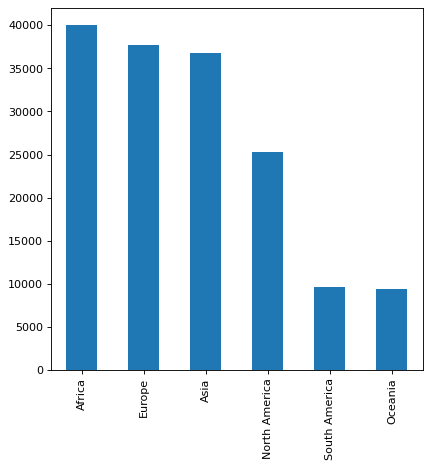

In [18]:
continent_wise=df.continent.value_counts()
figure(figsize=(6,6), dpi=80)
continent_wise[:10].plot(kind='bar')
plt.show()

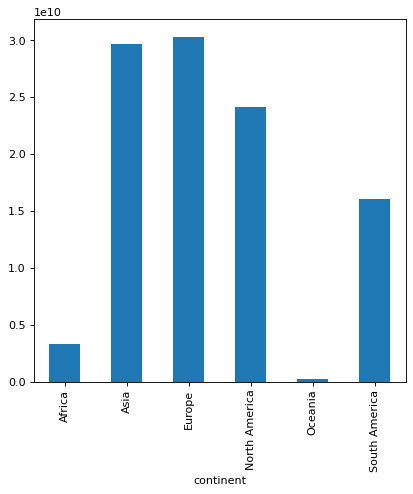

In [32]:
total_case_continent=df.groupby('continent').total_cases.sum()
figure(figsize=(6,6), dpi=80)
total_case_continent.plot(kind='bar')
plt.show()

In [31]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [53]:
asia_cases=df[df.location=='Asia']
asia_cases.sort_values('new_deaths',ascending=False).head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
8800,OWID_ASI,NaN,Asia,2021-07-20,59412555.0,220387.0,205128.571,855957.0,6659.0,3586.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8737,OWID_ASI,NaN,Asia,2021-05-18,47532693.0,352234.0,388634.429,623244.0,6203.0,5654.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [78]:
removing_world=df[df['location']!='World']
removing_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168844,ZWE,Africa,Zimbabwe,2022-03-12,242069.0,521.0,435.714,5412.0,4.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168845,ZWE,Africa,Zimbabwe,2022-03-13,242515.0,446.0,472.286,5414.0,2.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168846,ZWE,Africa,Zimbabwe,2022-03-14,242909.0,394.0,457.000,5416.0,2.0,2.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168847,ZWE,Africa,Zimbabwe,2022-03-15,242909.0,0.0,366.571,5416.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [84]:
removing_world_irrelevantdata=df[(df['location']!='World')&(df['location']!='High income')&(df['location']!='Upper middle income')]
removing_world_irrelevantdata

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168844,ZWE,Africa,Zimbabwe,2022-03-12,242069.0,521.0,435.714,5412.0,4.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168845,ZWE,Africa,Zimbabwe,2022-03-13,242515.0,446.0,472.286,5414.0,2.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168846,ZWE,Africa,Zimbabwe,2022-03-14,242909.0,394.0,457.000,5416.0,2.0,2.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
168847,ZWE,Africa,Zimbabwe,2022-03-15,242909.0,0.0,366.571,5416.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [92]:
df.groupby('location')['new_cases'].sum()

location
Afghanistan             176751.0
Africa                11422818.0
Albania                 272804.0
Algeria                 265496.0
Andorra                  38794.0
                        ...     
Wallis and Futuna          454.0
World                462733571.0
Yemen                    11798.0
Zambia                  315496.0
Zimbabwe                243656.0
Name: new_cases, Length: 238, dtype: float64